In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn import metrics


In [2]:
%matplotlib inline

In [4]:
dataset = load_boston()
df = pd.DataFrame(data=dataset.data,
                  columns=dataset.feature_names)
df_scaled = pd.DataFrame(data=preprocessing.scale(dataset.data),
                         columns=dataset.feature_names)

In [5]:
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,6.340997e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.177134e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.088961e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.885818e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,6.248255e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.941735e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


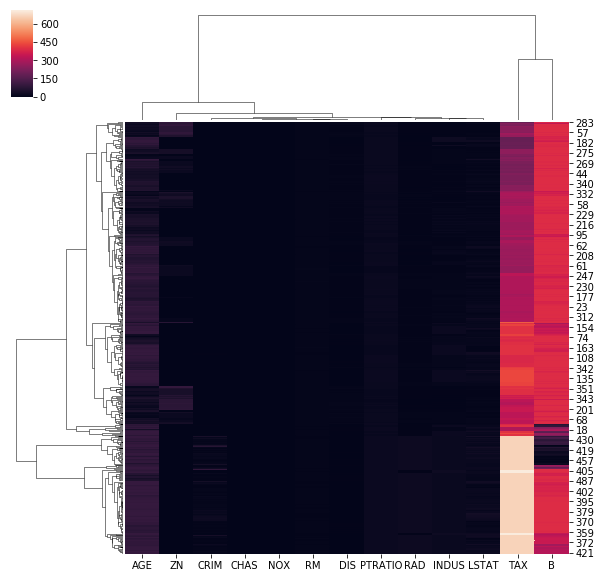

In [19]:
sns.clustermap(df,
               method='average',
               metric='euclidean',
               z_score=None,
               standard_scale=None)

In [12]:
clust_model = KMeans(n_clusters=4,
                     init='k-means++')
clust_labels = clust_model.fit_predict(df)
print(clust_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 3 3 0 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 1 2 2 2 2 1 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [11]:
silhouette_avg = metrics.silhouette_score(df,
                                          clust_labels)

print(silhouette_avg)

0.568219170853


In [17]:
target_values = dataset.target
#target_values = scale(dataset.target)

target_labels = pd.qcut(x=target_values,q=4,labels=[1,2,3,4])
class_labels = target_labels.astype('int32') - 1

print(class_labels)

[2 2 3 3 3 3 2 3 0 1 0 1 2 1 1 1 2 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 2 3 3 3 3 2 1 1 1 0 0 1 1 1 2 2 1 3 2 3 2 1 1 0 2 2 3 2 1 2 1 1 2 2 2 2
 2 2 1 1 1 1 3 2 2 2 2 3 2 2 2 3 2 2 2 2 1 3 2 3 3 3 3 3 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 0 0 1 0 1 1 2 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 2 1 0 1 0 0 0 3 2 2 3 3 3 3 2 2 3 2 2 2 1 1 2 2 2 3 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 2 2 1 2 1 2 3 2 2 2 3 2 2 3 2
 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 2 2 2 1 2 2 1 1 2 1 2 3 2 2 3 3 2 1 3 3 3
 3 3 3 3 3 3 2 3 3 3 1 1 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 2 2 3 3 3 2 2 3
 3 1 2 3 2 2 3 3 3 3 3 3 2 1 0 2 1 2 2 0 1 1 2 1 2 2 1 1 2 2 2 2 1 2 1 1 1
 2 1 1 1 1 1 1 1 3 0 2 3 1 1 2 2 3 2 2 1 3 1 1 1 2 2 2 2 1 1 0 2 3 2 2 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 1 3 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 2 1 1 1 1 1 1 1 2 3 0 0 0 0 0 2 2
 2 2 2 1 1 1 1 0 0 0 0 1 

In [16]:
h_score = metrics.homogeneity_score(class_labels,
                                    clust_labels)
c_score = metrics.completeness_score(class_labels,
                                     clust_labels)
r_score = metrics.adjusted_rand_score(class_labels,
                                      clust_labels)
mi_score = metrics.adjusted_mutual_info_score(class_labels,
                                              clust_labels)

print(h_score,
      c_score,
      r_score,
      mi_score)

0.136527129182 0.161503460454 0.106793348941 0.13087186721


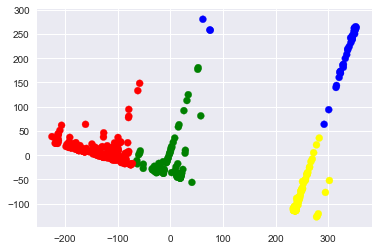

In [14]:
from sklearn.decomposition import PCA

colormap = np.array(['red', 'yellow', 'blue', 'green'])

pca_col = PCA(2).fit_transform(df)
plt.scatter(x=pca_col[:,0],
            y=pca_col[:,1],
            c=colormap[clust_labels])
plt.show()

In [15]:
df['MEDV'] = dataset.target
#df_scaled['MEDV'] = preprocessing.scale(dataset.target)

df['CLUST'] = clust_labels
#df_scaled['ClUST'] = clust_labels

df['CLASS'] = class_labels

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CLUST,CLASS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0,2
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0,3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0,3


In [17]:
C0 = df.loc[df['CLUST'] == 0]

In [18]:
C0.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CLUST,CLASS
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.000000
mean,0.241048,17.817164,6.668582,0.074627,0.483398,6.465448,55.705224,4.873560,4.313433,276.548507,17.873134,387.814067,9.538022,25.865299,0.0,1.981343
std,0.321518,26.758529,4.398602,0.263280,0.059580,0.679890,26.604912,1.908752,1.839711,39.544143,2.047988,18.591322,5.300122,8.282685,0.0,0.949880
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.973000,2.900000,1.757200,1.000000,187.000000,12.600000,232.600000,1.980000,11.900000,0.0,0.000000
25%,0.050770,0.000000,3.970000,0.000000,0.434500,5.967500,33.175000,3.476825,3.000000,247.000000,16.600000,386.825000,5.870000,20.575000,0.0,1.000000
50%,0.109930,0.000000,6.060000,0.000000,0.488000,6.342000,56.300000,4.458300,4.000000,284.000000,18.100000,393.365000,8.245000,23.450000,0.0,2.000000
75%,0.300237,25.000000,8.140000,0.000000,0.524000,6.818500,79.375000,6.113250,5.000000,307.000000,19.100000,396.900000,11.725000,29.675000,0.0,3.000000
max,2.635480,100.000000,25.650000,1.000000,0.647000,8.725000,100.000000,12.126500,8.000000,351.000000,22.000000,396.900000,30.810000,50.000000,0.0,3.000000


In [19]:
L0 = df.loc[df['CLASS'] == 0]

In [20]:
L0.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CLUST,CLASS
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0
mean,10.907463,0.393701,17.018189,0.039370,0.668157,5.886496,92.868504,2.277718,17.141732,567.834646,19.651969,285.830315,21.067795,12.726772,1.354331,0.0
std,14.238249,2.698934,4.641761,0.195244,0.094925,0.592155,9.240411,1.173490,9.479907,153.257837,1.774996,143.964769,5.972431,2.974533,0.913110,0.0
min,0.024980,0.000000,1.890000,0.000000,0.448000,4.138000,37.800000,1.137000,1.000000,188.000000,14.700000,0.320000,7.880000,5.000000,0.000000,0.0
25%,1.400920,0.000000,18.100000,0.000000,0.603000,5.550500,90.550000,1.598450,5.000000,403.000000,20.200000,171.090000,17.115000,10.850000,1.000000,0.0
50%,7.672020,0.000000,18.100000,0.000000,0.679000,5.950000,95.400000,1.866200,24.000000,666.000000,20.200000,363.020000,19.920000,13.400000,1.000000,0.0
75%,13.795750,0.000000,18.100000,0.000000,0.713000,6.342000,98.850000,2.334800,24.000000,666.000000,20.200000,396.660000,24.275000,15.000000,2.000000,0.0
max,88.976200,25.000000,27.740000,1.000000,0.871000,7.313000,100.000000,6.818500,24.000000,711.000000,21.200000,396.900000,37.970000,17.000000,3.000000,0.0
